In [1]:
#import libraries needed
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read in file
housing_df = pd.read_csv('houseSales/house_sales.csv')

In [3]:
#check number of rows and columns
housing_df.shape

(21613, 21)

In [10]:
#count the number of categorical variables and countinuous variables
cat_count = 0
for attr in housing_df.dtypes:
    if attr == 'object':
        cat_count = cat_count + 1
cont_count = housing_df.shape[1] - cat_count - 1
print(f"Number of Categorical Variables: {cat_count}")
print(f"Number of Continuous Variables: {cont_count}")

Number of Categorical Variables: 1
Number of Continuous Variables: 19


In [11]:
#print first 5 rows 
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
#check the column names
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
#missing data
total = housing_df.isnull().sum().sort_values(ascending=False)
percent = (housing_df.isnull().sum()/housing_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
bedrooms,1134,0.052468
sqft_living,1110,0.051358
bathrooms,1068,0.049415
sqft_lot,1044,0.048304
id,0,0.000000
sqft_basement,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000


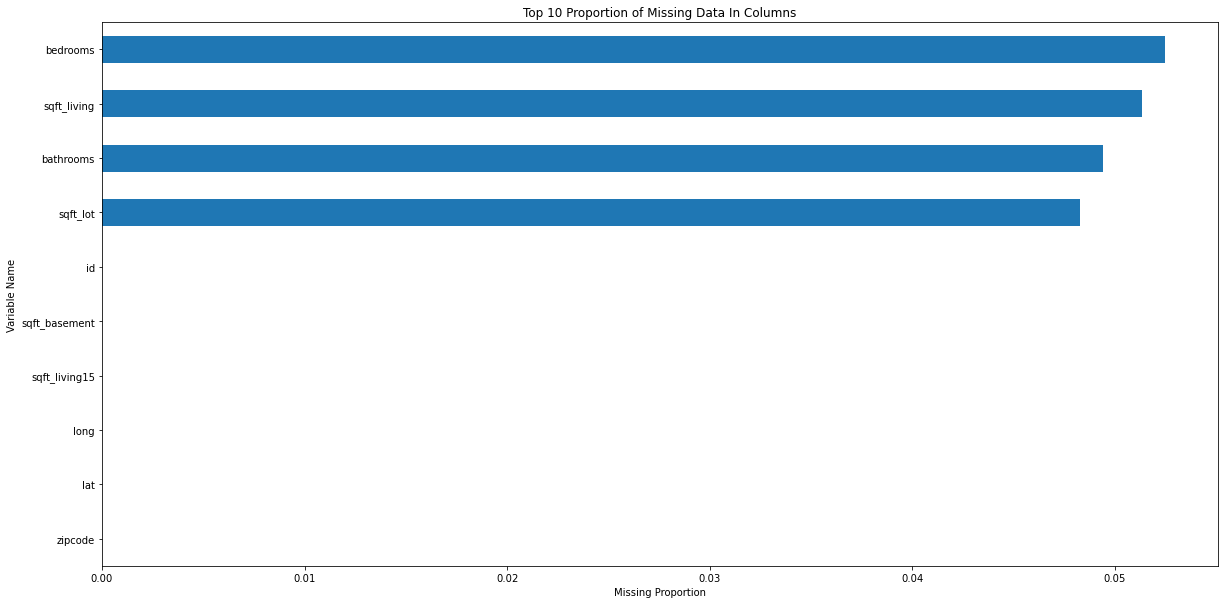

In [15]:
missing_data['Percent'].head(10).plot(kind='barh', figsize = (20,10)).invert_yaxis() #top 10 missing columns
plt.xlabel("Missing Proportion")
plt.ylabel("Variable Name")
plt.title("Top 10 Proportion of Missing Data In Columns")
plt.show()

In [17]:
#dealing with missing data
housing_df["bedrooms"] = housing_df["bedrooms"].fillna("None")
housing_df["sqft_living"] = housing_df["sqft_living"].fillna("None")
housing_df["bathrooms"] = housing_df["bathrooms"].fillna("None")
housing_df["sqft_lot"] = housing_df["sqft_lot"].fillna("None")